In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import preprocessing, decomposition

In [3]:
dati = np.load("../Dataset/dati.npz")
X = dati["X"]
y = dati["y"]

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, Y = oversample.fit_resample(X, y)

X_df = pd.read_csv("../Dataset/Dati_df")
col_names = X_df.columns 
print(X.shape)
print(y.shape)

X_df

(1637114, 14)
(820572,)


a         e          i          om           w         q  \
0       2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
1       2.772466  0.230337  34.836234  173.080063  310.048857  2.133865   
2       2.669150  0.256942  12.988919  169.852760  248.138626  1.983332   
3       2.361418  0.088721   7.141771  103.810804  150.728541  2.151909   
4       2.574249  0.191095   5.366988  141.576605  358.687607  2.082324   
...          ...       ...        ...         ...         ...       ...   
820567  2.812945  0.664688   4.695700  183.310012  234.618352  0.943214   
820568  2.645238  0.259376  12.574937    1.620020  339.568072  1.959126   
820569  2.373137  0.202053   0.732484  176.499082  198.026527  1.893638   
820570  2.260404  0.258348   9.661947  204.512448  148.496988  1.676433   
820571  2.546442  0.287672   5.356238   70.709555  273.483265  1.813901   

              ad     per_y       H  neo      moid         n          per  \
0       2.979647  4.608202   3.340    0  1.594780  0.213885  1683.145708   
1       3.411067  4.616444   4.130    0  1.233240  0.213503  1686.155999   
2       3.354967  4.360814   5.330    0  1.034540  0.226019  1592.787285   
3       2.570926  3.628837   3.200    0  1.139480  0.271609  1325.432765   
4       3.066174  4.130323   6.850    0  1.095890  0.238632  1508.600458   
...          ...       ...     ...  ...       ...       ...          ...   
820567  4.682676  4.717914  20.400    1  0.032397  0.208911  1723.217927   
820568  3.331350  4.302346  17.507    0  0.956145  0.229090  1571.431965   
820569  2.852636  3.655884  18.071    0  0.893896  0.269600  1335.311579   
820570  2.844376  3.398501  18.060    0  0.680220  0.290018  1241.302609   
820571  3.278983  4.063580  17.406    0  0.815280  0.242551  1484.222588   

                ma  
0        77.372096  
1        59.699133  
2        34.925016  
3        95.861936  
4       282.366289  
...            ...  
820567  156.905910  
820568   13.366251  
820569  355.351127  
820570   15.320134  
820571   20.432959  

[820572 rows x 14 columns]

In [4]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820572 entries, 0 to 820571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   a       820572 non-null  float64
 1   e       820572 non-null  float64
 2   i       820572 non-null  float64
 3   om      820572 non-null  float64
 4   w       820572 non-null  float64
 5   q       820572 non-null  float64
 6   ad      820572 non-null  float64
 7   per_y   820572 non-null  float64
 8   H       820572 non-null  float64
 9   neo     820572 non-null  int64  
 10  moid    820572 non-null  float64
 11  n       820572 non-null  float64
 12  per     820572 non-null  float64
 13  ma      820572 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 87.6 MB


In [5]:
print("Minmax")
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_scaled_minmax = scaler.transform(X)
df_scaled_minmax = pd.DataFrame(X_scaled_minmax, columns = col_names)
print(df_scaled_minmax.describe().T)

print("Maxabs")
scaler = preprocessing.MaxAbsScaler()
scaler.fit(X)
X_scaled_maxabs = scaler.transform(X)
df_scaled_maxabs = pd.DataFrame(X_scaled_maxabs, columns = col_names)
print(df_scaled_maxabs.describe().T)

print("Normal")
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_normal = scaler.transform(X)
df_scaled_normal = pd.DataFrame(X_scaled_normal, columns = col_names)
print(df_scaled_normal.describe().T)

print("Robust")
scaler = preprocessing.RobustScaler()
scaler.fit(X)
X_scaled_robust = scaler.transform(X)
df_scaled_robust  = pd.DataFrame(X_scaled_minmax, columns = col_names)
print(df_scaled_robust.describe().T)


Minmax
           count      mean       std  min       25%       50%       75%  max
a      1637114.0  0.000586  0.001622  0.0  0.000377  0.000586  0.000701  1.0
e      1637114.0  0.345158  0.230783  0.0  0.141974  0.275110  0.560497  1.0
i      1637114.0  0.063955  0.049220  0.0  0.028824  0.050868  0.084326  1.0
om     1637114.0  0.475399  0.281894  0.0  0.229204  0.459919  0.708270  1.0
w      1637114.0  0.502929  0.279163  0.0  0.260001  0.510462  0.744530  1.0
q      1637114.0  0.018823  0.022414  0.0  0.008963  0.011894  0.026824  1.0
ad     1637114.0  0.000381  0.001514  0.0  0.000279  0.000357  0.000438  1.0
per_y  1637114.0  0.000026  0.001076  0.0  0.000011  0.000019  0.000024  1.0
H      1637114.0  0.568870  0.065962  0.0  0.518950  0.568513  0.624312  1.0
neo    1637114.0  0.511839  0.499860  0.0  0.000000  1.000000  1.000000  1.0
moid   1637114.0  0.009122  0.021890  0.0  0.000289  0.000595  0.015590  1.0
n      1637114.0  0.160688  0.110921  0.0  0.093953  0.115762  0.1861

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


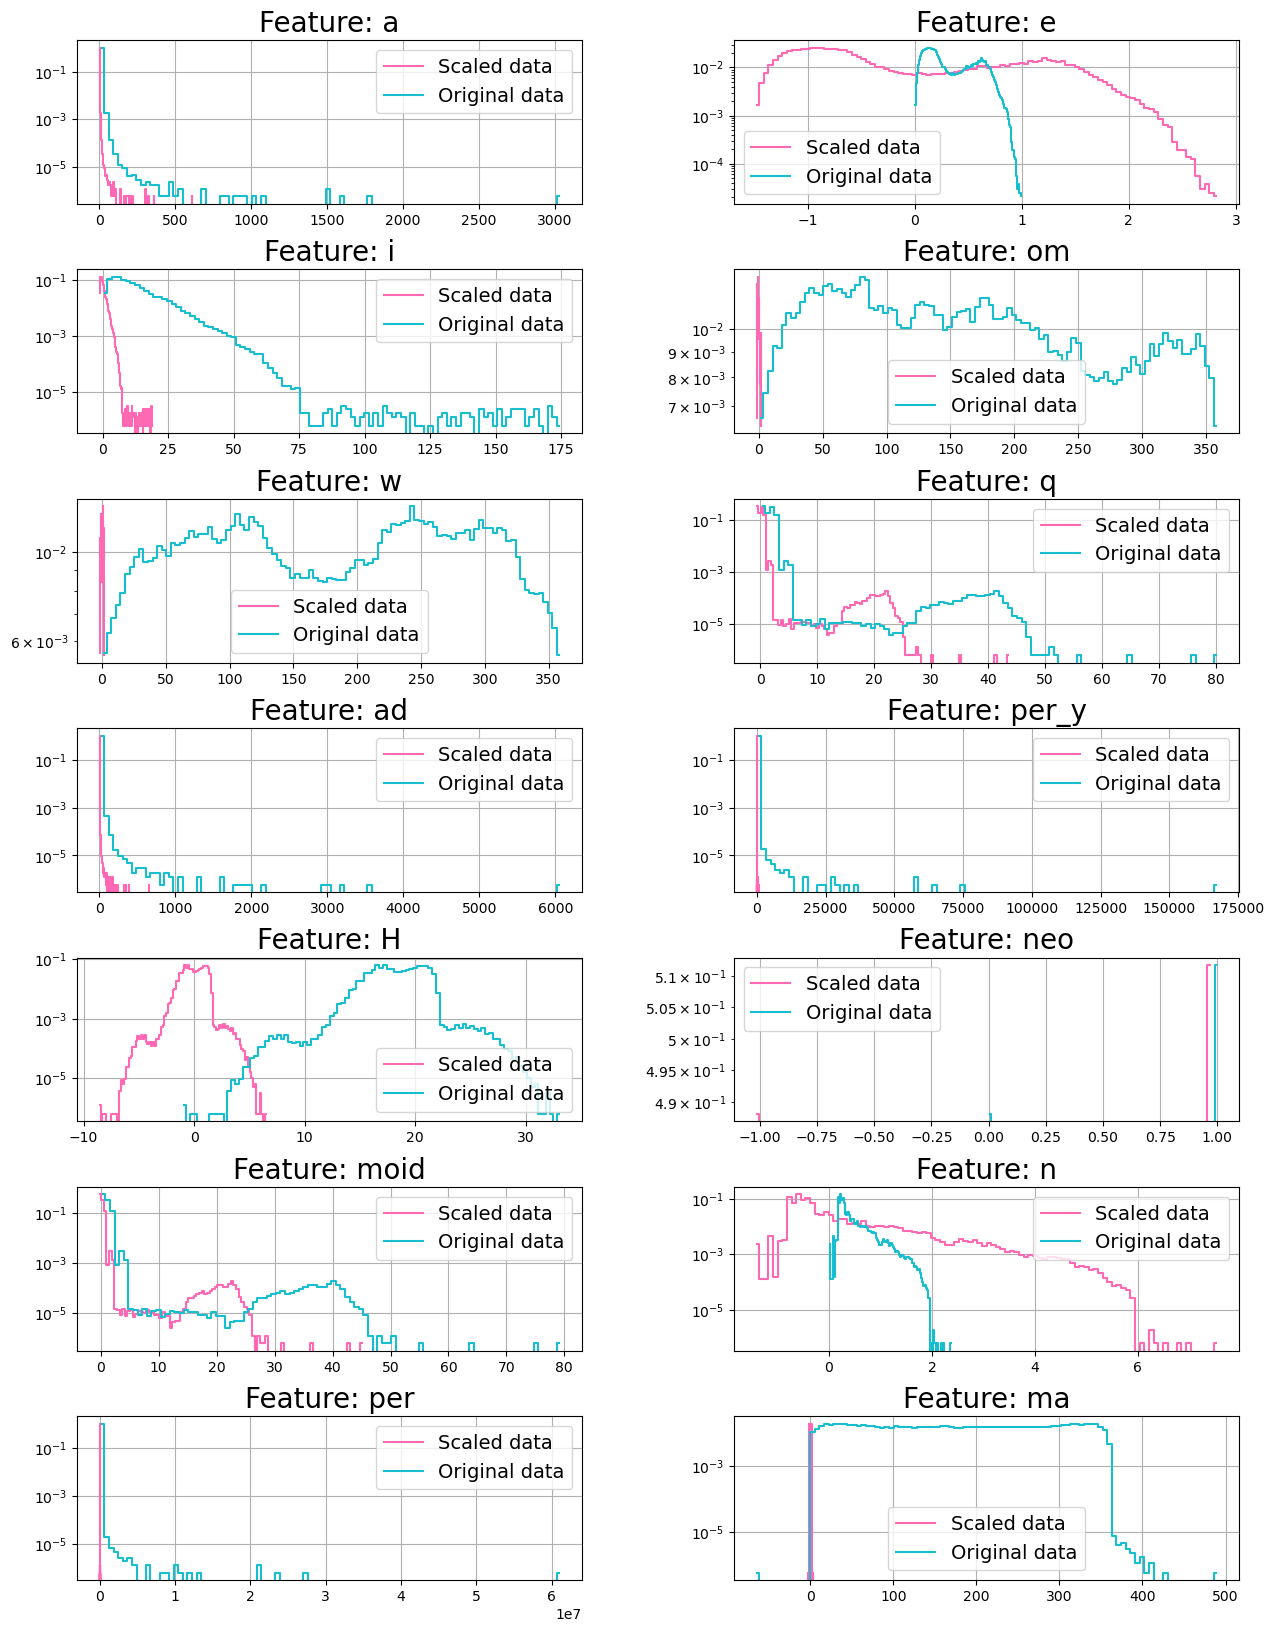

In [6]:


fig, ax = plt.subplots(7, 2)
fig.set_size_inches(15,20)
fig.subplots_adjust(hspace = .4, wspace = .3)
ax = ax.flatten()

for i in range(X.shape[1]):
    h, bins = np.histogram(X_scaled_normal[:,i], bins = 100)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h/np.sum(h), ds = "steps-mid", label = "Scaled data", c = "hotpink")
    #ax[i].fill_between(binc, h, step = "mid", color = "lime", alpha = 1)
    
    h, bins = np.histogram(X[:,i], bins = 100)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h/np.sum(h), ds = "steps-mid", label = "Original data", c = "tab:cyan")
    #ax[i].fill_between(binc, h, step = "mid", color = "lime", alpha = 1)
    
    ax[i].set_yscale("log")
    

    
    
    ax[i].grid()
    ax[i].legend(fontsize = 14)
    ax[i].set_title(f"Feature: {col_names[i]}", fontsize = 20)
    
fig.savefig("../Relazione/Grafici/scaling.eps", format = 'eps')
    
plt.show()

In [7]:
myCov = np.cov(X_scaled_normal, rowvar = False)
myCov.shape

(14, 14)

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

# Plotto la matrice di covarianza
im = ax.imshow(myCov, cmap = "coolwarm", origin = "upper")

#ax.set_title(f"Matrice di covarianza sui dati riscalati)", fontsize = 16)

# Stampo i valori sulle celle
for i in range(myCov.shape[0]):
    for j in range(myCov.shape[1]):
        text = ax.text(j, i, f"{myCov[i, j]:.2f}",
                       ha="center", va="center", color="w", )#weight="semibold")

# Disegno la colorbar
fig.colorbar(im)

# Per la relazione devo rinunciare ai numeri...
# fig.savefig("../LATEX/FIGURE/02-cov-matrix.pdf", format = "pdf", bbox_inches = "tight")
fig.savefig("../Relazione/Grafici/mat_covarianza.eps", format = 'eps',bbox_inches = "tight")

plt.show()

In [9]:
# Applico la PCA
pca = decomposition.PCA()
pca.fit(X_scaled_normal)
#x_pca = pca.transform(x_scaled)

# Estraggo le Explained Variances
X_ev = pca.explained_variance_ratio_
X_cumev = np.cumsum(X_ev)

"""
Prove su features e numero di componenti
Nota bene: Come osservato in fase di grid search, in base al particolare blocco
di TrS può variare, di circa una feature...
"""
print(f"Soglia 90 %: {np.sum(X_cumev < .9)} features")
print(f"Soglia 95 %: {np.sum(X_cumev < .95)} features")
print(f"Soglia 98 %: {np.sum(X_cumev < .98)} features")
print(f"Soglia 99 %: {np.sum(X_cumev < .99)} features")

Soglia 90 %: 6 features
Soglia 95 %: 7 features
Soglia 98 %: 8 features
Soglia 99 %: 9 features


In [10]:
pca.components_.shape


(14, 14)

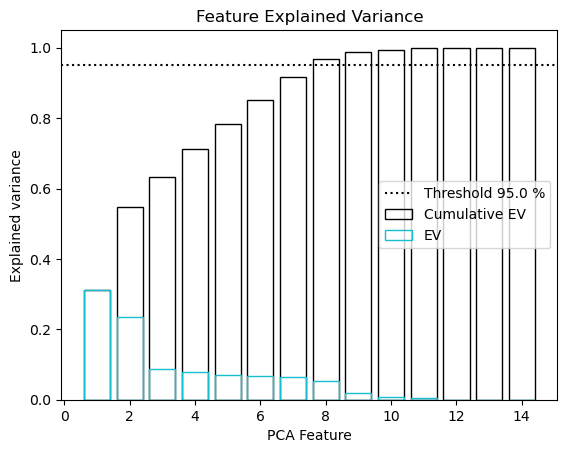

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [21]:
fig, ax = plt.subplots()
thr = .95

ax.bar(range(1, len(X_cumev)+1),
       X_cumev,
       label = 'Cumulative EV',
       edgecolor = 'k',
       fill=False
       )

# Bar plot of explained_variance
ax.bar(
    range(1,len(X_ev)+1),
    X_ev,
    label = 'EV',
    edgecolor = 'tab:cyan',
    fill = False
    )
 
ax.axhline(y = thr, ls = ":", c = "k", label = f"Threshold {thr*100} %")



ax.legend(loc = 7)
ax.set_xlabel('PCA Feature')
ax.set_ylabel('Explained variance')
ax.set_title('Feature Explained Variance')
plt.show()
fig.savefig("../Relazione/Grafici/EV.eps", format = 'eps',bbox_inches = "tight")



In [ ]:
thr = .95

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

ax.plot(X_ev, ls = ":", marker = "^", label = "Explained Variance (EV)", c = "tab:red")
ax.plot(X_cumev, ls = ":", marker = "*", label  = "Cumulative EV", c = "tab:green")

ax.axhline(y = thr, ls = ":", c = "k", label = f"Threshold {thr*100} %")

ax.set_xlabel("Componenti principali", fontsize = 14)
ax.set_ylabel("Explained variance", fontsize = 14)

ax.grid()
ax.legend(fontsize = 14)


print(f"Features < thr: {np.sum(X_cumev <= thr)}")

plt.show()

Features < thr: 7
